In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

# Regression vs. Classification in Machine Learning
Regression and Classification algorithms are Supervised Learning algorithms. Both the algorithms are used for prediction in Machine learning and work with the labeled datasets. But the difference between both is how they are used for different machine learning problems.

The main difference between Regression and Classification algorithms that Regression algorithms are used to predict the continuous values such as price, salary, age, etc. and Classification algorithms are used to predict/Classify the discrete values such as Male or Female, True or False, Spam or Not Spam, etc.

Consider the below diagram:

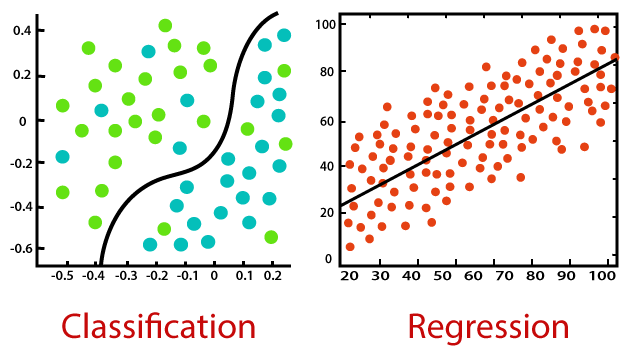

In [34]:
import seaborn as sns

In [6]:
import os
os.chdir(r'E:\PML\Datasets-20230112T094652Z-001\Datasets')
import pandas as pd

In [7]:
kyp = pd.read_csv("Kyphosis/Kyphosis.csv")
kyp

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [9]:
X = kyp.drop(['Kyphosis'], axis=1)
y = kyp['Kyphosis']
X,y

(    Age  Number  Start
 0    71       3      5
 1   158       3     14
 2   128       4      5
 3     2       5      1
 4     1       4     15
 ..  ...     ...    ...
 76  157       3     13
 77   26       7     13
 78  120       2     13
 79   42       7      6
 80   36       4     13
 
 [81 rows x 3 columns],
 0      absent
 1      absent
 2     present
 3      absent
 4      absent
        ...   
 76    present
 77     absent
 78     absent
 79    present
 80     absent
 Name: Kyphosis, Length: 81, dtype: object)

In [17]:
dum_y=pd.get_dummies(y, drop_first=True)
dum_y

,present
0,0
1,0
2,1
3,0
4,0
...,...
76,1
77,0
78,0
79,1


In [21]:
pd.Series(dum_y['present']) #Converting DF to Series to remove warnings

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: present, Length: 81, dtype: uint8

In [14]:
params={'KNN__n_neighbors':np.arange(1,23,2)}


In [22]:
knn = KNeighborsClassifier()
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='roc_auc') #Replace knn with pipe object
gcv.fit(X,pd.Series(dum_y['present']))

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'KNN__n_neighbors': 9}
0.8205128205128206


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003600,4.856027e-04,0.002999,6.274958e-04,1,{'KNN__n_neighbors': 1},0.759615,0.500000,0.756410,0.666667,0.458333,0.628205,0.126868,11
1,0.002799,3.996851e-04,0.002398,4.895123e-04,3,{'KNN__n_neighbors': 3},0.759615,0.730769,0.923077,0.897436,0.687500,0.799679,0.093511,6
2,0.002599,4.895121e-04,0.002396,4.920484e-04,5,{'KNN__n_neighbors': 5},0.692308,0.679487,0.974359,0.910256,0.791667,0.809615,0.116864,4
3,0.002798,3.996373e-04,0.002198,3.993512e-04,7,{'KNN__n_neighbors': 7},0.750000,0.692308,0.948718,0.948718,0.760417,0.820032,0.107603,2
4,0.002595,4.870275e-04,0.002402,4.871837e-04,9,{'KNN__n_neighbors': 9},0.798077,0.679487,0.910256,0.923077,0.791667,0.820513,0.089215,1
5,0.002998,4.909339e-07,0.001999,8.064048e-07,11,{'KNN__n_neighbors': 11},0.798077,0.666667,0.910256,0.910256,0.781250,0.813301,0.091172,3
6,0.002398,4.896289e-04,0.002399,4.897067e-04,13,{'KNN__n_neighbors': 13},0.817308,0.666667,0.858974,0.910256,0.718750,0.794391,0.089617,10
7,0.002798,3.998042e-04,0.002398,4.951655e-04,15,{'KNN__n_neighbors': 15},0.807692,0.717949,0.833333,0.897436,0.718750,0.795032,0.069101,9
8,0.002998,3.814697e-07,0.002199,3.995896e-04,17,{'KNN__n_neighbors': 17},0.855769,0.653846,0.833333,0.923077,0.718750,0.796955,0.097248,7
9,0.002599,4.895707e-04,0.002399,4.896483e-04,19,{'KNN__n_neighbors': 19},0.846154,0.602564,0.846154,0.884615,0.802083,0.796314,0.100337,8


***

In [108]:
from sklearn.preprocessing import LabelEncoder
pix = pd.read_csv("Image Segmentation/Image_Segmention.csv")
pix.head(10)

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
5,BRICKFACE,26,67,9,0.111111,0.0,1.000000,0.888890,2.444445,3.185185,20.000000,19.555555,25.888890,14.555555,-1.333333,17.666666,-16.333334,25.888890,0.436939,-1.623202
6,BRICKFACE,14,110,9,0.000000,0.0,1.722222,5.351851,2.666667,1.022223,17.925926,18.888890,21.444445,13.444445,2.888889,10.555555,-13.444445,21.444445,0.368848,-1.345096
7,BRICKFACE,11,108,9,0.000000,0.0,1.333333,0.800000,1.388889,0.951852,17.666666,19.000000,21.111110,12.888889,4.000000,10.333333,-14.333333,21.111110,0.388756,-1.302133
8,BRICKFACE,85,101,9,0.000000,0.0,1.333333,1.288888,1.277778,1.218518,21.296297,21.222221,26.777779,15.888889,-0.222222,16.444445,-16.222221,26.777779,0.404792,-1.558599
9,BRICKFACE,18,145,9,0.000000,0.0,0.388889,0.018518,0.611111,0.374074,3.925926,5.555555,4.000000,2.222222,4.888889,0.222222,-5.111111,5.555555,0.600529,-0.570940


In [109]:
X = pix.drop('Class', axis=1)
y = pix['Class']
X

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
205,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
206,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
207,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [110]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [111]:
knn = KNeighborsClassifier()
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='neg_log_loss') #Doesnt work since simple log_loss is not used for multiclassification
#so scoring=neg_log_loss is used
gcv.fit(X,le_y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'KNN__n_neighbors': 19}
-0.7175255432071946


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003801,1.171235e-03,0.053966,0.001554,1,{'KNN__n_neighbors': 1},-8.581822,-3.432729,-6.007276,-6.007276,-7.912021,-6.388225,1.797722,11
1,0.003198,3.996134e-04,0.055168,0.000400,3,{'KNN__n_neighbors': 3},-6.979741,-1.004232,-3.516810,-4.355684,-4.505622,-4.072418,1.920568,10
2,0.002998,1.784161e-07,0.054769,0.000400,5,{'KNN__n_neighbors': 5},-5.368794,-0.160944,-1.934640,-1.887527,-3.699804,-2.610342,1.776208,9
3,0.003398,4.891228e-04,0.053970,0.001094,7,{'KNN__n_neighbors': 7},-4.576259,-0.230914,-1.950379,-1.920541,-2.901672,-2.315953,1.420523,8
4,0.003598,4.892787e-04,0.054968,0.000633,9,{'KNN__n_neighbors': 9},-3.031239,-0.262500,-1.170309,-1.120476,-2.080309,-1.532966,0.944474,7
5,0.002998,2.780415e-07,0.055368,0.000799,11,{'KNN__n_neighbors': 11},-3.030687,-0.323474,-1.195613,-1.145593,-0.417083,-1.222490,0.972946,6
6,0.003398,4.898625e-04,0.055368,0.000490,13,{'KNN__n_neighbors': 13},-2.269836,-0.361214,-1.235702,-1.176965,-0.402706,-1.089285,0.696320,3
7,0.003198,3.996849e-04,0.055368,0.000800,15,{'KNN__n_neighbors': 15},-2.297839,-0.402797,-1.269104,-1.198372,-0.448534,-1.123329,0.690054,4
8,0.003197,4.004313e-04,0.054968,0.001265,17,{'KNN__n_neighbors': 17},-2.336318,-0.433910,-1.293883,-1.236833,-0.470019,-1.154193,0.694358,5
9,0.003598,1.199389e-03,0.054969,0.000632,19,{'KNN__n_neighbors': 19},-1.594039,-0.474491,-0.536761,-0.489816,-0.492520,-0.717526,0.438747,1


For Multi-Class problems as scoring =**'roc_auc'** is not supported, we can use log loss with the option **"neg_log_loss"**

The class in which response variable aka Y is missing is called **unlabelled data**. In other words it needs to be predicted.

<AxesSubplot: >

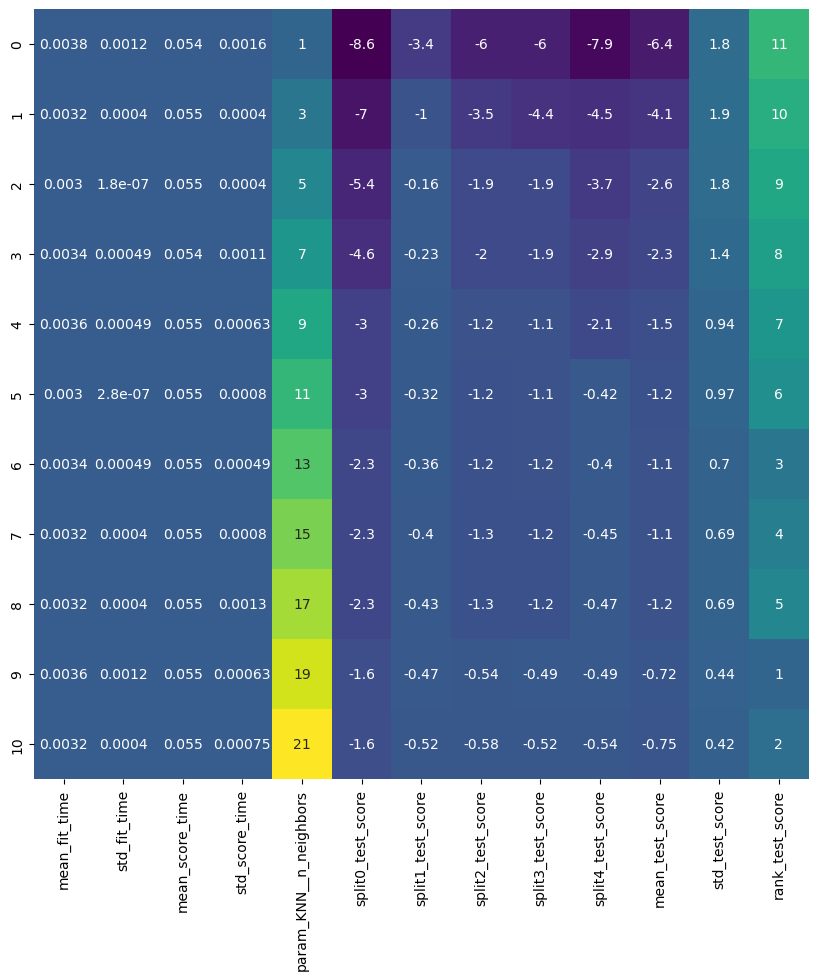

In [112]:
import matplotlib.pyplot as plt
temp=pd.DataFrame(gcv.cv_results_).drop('params',axis=1)
DF = temp[temp.columns].astype(float)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data=DF,annot=True,xticklabels=True, yticklabels=True,cbar=False,cmap="viridis")

In [113]:
pix_unlabel = pd.read_csv("Image Segmentation/tst_img.csv")
pix_unlabel

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,22,90,10,0,0,0.666668,0.044444,0.880000,0.562963,112.000000,105.888885,128.555560,106.000000,-22.777779,45.222220,-22.444445,128.555560,0.179697,-2.097815
1,210,200,9,0,0,1.300000,0.998145,1.611111,1.123816,49.481480,45.000000,60.666668,43.000000,-14.111111,35.000000,-19.444445,60.666668,0.290788,-1.987599
2,240,184,9,0,0,0.500000,0.077778,0.777778,0.785185,11.851851,9.777778,9.888889,15.888889,-5.000000,-5.888889,13.000000,15.888889,0.500000,2.128646
3,130,191,9,0,0,1.000000,0.400000,1.500000,1.011111,7.333334,5.333334,5.000000,11.222222,-7.000000,-5.666666,11.666667,11.222222,0.535820,2.122422


No we use the HYPERPARAMETER given by Grid Search, train the model on test data and use unlabelled data to predict on.
We scale the unlabelled data and using pipe and pass it to KNN with K=19 and then use pipe.predict to make predictions.
The predictionns are however label encoded as the Y in the original test data. Hence we need to decode using **LabelEncoder().inverse_transform** fuction.

In [114]:
scaler=StandardScaler()
knn = KNeighborsClassifier(n_neighbors=19)
pipe=Pipeline([('STD',scaler),('KNN',knn)])
pipe.fit(X,le_y)
y_pred=pipe.predict(pix_unlabel)
predictions=label.inverse_transform(y_pred)
predictions

array(['SKY', 'PATH', 'GRASS', 'GRASS'], dtype=object)

However since we used GridSearch we dont require to build the model again with the best Hyperparameter, we can direcly use gcv.predict

In [115]:
y_pred=gcv.predict(pix_unlabel)
predictions=label.inverse_transform(y_pred)
predictions

array(['SKY', 'PATH', 'GRASS', 'GRASS'], dtype=object)

***

### Excercise ###

In [116]:
from sklearn.preprocessing import LabelEncoder
car = pd.read_csv("Vehicle Silhouettes/Vehicle.csv")
car.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [117]:
X = car.drop('Class', axis=1)
y = car['Class']
X

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [118]:
y

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: Class, Length: 846, dtype: object

In [119]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([3, 3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3,
       0, 0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 3, 2,
       2, 3, 3, 0, 3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1,
       0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3,
       0, 1, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0,
       3, 3, 1, 1, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 0, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 1, 0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2,
       3, 0, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2, 0, 2, 0,
       0, 0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 1, 0, 1, 1,
       0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2,

In [120]:
knn = KNeighborsClassifier()
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='neg_log_loss') #Doesnt work since ROC-AUC is not used for multiclassification
#Also scoring=neg_log_loss is used
gcv.fit(X,le_y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'KNN__n_neighbors': 21}
-0.7080626135234716


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003198,4.000905e-04,0.056369,0.000489,1,{'KNN__n_neighbors': 1},-8.692881,-12.370011,-10.450527,-10.023975,-11.090355,-10.525550,1.211357,11
1,0.003797,3.995658e-04,0.056168,0.000400,3,{'KNN__n_neighbors': 3},-3.299430,-3.563727,-3.496630,-3.745813,-4.176159,-3.656352,0.296542,10
2,0.002998,3.873843e-07,0.056368,0.000489,5,{'KNN__n_neighbors': 5},-1.941366,-2.184534,-1.904809,-1.338740,-1.994459,-1.872782,0.283875,9
3,0.003198,3.999710e-04,0.056367,0.000490,7,{'KNN__n_neighbors': 7},-1.170593,-1.598108,-0.907682,-0.558206,-1.239479,-1.094814,0.347258,8
4,0.003998,3.504023e-07,0.055568,0.001959,9,{'KNN__n_neighbors': 9},-0.986850,-0.999030,-0.719950,-0.563633,-1.043682,-0.862629,0.187921,7
5,0.003198,3.997566e-04,0.056767,0.000748,11,{'KNN__n_neighbors': 11},-0.812549,-1.010788,-0.543211,-0.574178,-1.055699,-0.799285,0.213028,6
6,0.002998,1.168008e-07,0.056568,0.000799,13,{'KNN__n_neighbors': 13},-0.644186,-0.811371,-0.560568,-0.583098,-1.078918,-0.735628,0.192799,5
7,0.003398,7.997275e-04,0.055568,0.001959,15,{'KNN__n_neighbors': 15},-0.659374,-0.633012,-0.578288,-0.599935,-1.081583,-0.710438,0.187630,2
8,0.002997,1.969516e-06,0.056367,0.000490,17,{'KNN__n_neighbors': 17},-0.680121,-0.643052,-0.598332,-0.612515,-1.097958,-0.726395,0.187891,3
9,0.003598,1.198745e-03,0.056768,0.000747,19,{'KNN__n_neighbors': 19},-0.689033,-0.646787,-0.612926,-0.620597,-1.102129,-0.734295,0.185831,4


***

For Regressor StratifiedKFold is not supported, so we only use KFold

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import KFold
house = pd.read_csv("Housing.csv")
house.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [122]:
X = house.drop('price', axis=1)
y = house['price']
y

0       42000.0
1       38500.0
2       49500.0
3       60500.0
4       61000.0
         ...   
541     91500.0
542     94000.0
543    103000.0
544    105000.0
545    105000.0
Name: price, Length: 546, dtype: float64

In [123]:
dum_X=pd.get_dummies(X, drop_first=True)
dum_X

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,5850,3,1,2,1,1,0,1,0,0,0
1,4000,2,1,1,0,1,0,0,0,0,0
2,3060,3,1,1,0,1,0,0,0,0,0
3,6650,3,1,2,0,1,1,0,0,0,0
4,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,0,1,1,0,0,1,0
542,6000,3,2,4,0,1,0,0,0,1,0
543,6000,3,2,4,1,1,1,0,0,1,0
544,6000,3,2,2,1,1,1,0,0,1,0


In [124]:
knn = KNeighborsRegressor()
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='r2') #r2 is used since its a regression problem
gcv.fit(dum_X,y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'KNN__n_neighbors': 9}
0.6026248217774922


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004794,0.001719,0.002601,0.000492,1,{'KNN__n_neighbors': 1},0.547969,0.352863,0.239871,0.252376,0.453095,0.369235,0.118015,11
1,0.003398,0.000490,0.002398,0.000489,3,{'KNN__n_neighbors': 3},0.703442,0.496669,0.488979,0.528485,0.592963,0.562108,0.079609,10
2,0.003599,0.000489,0.002398,0.000489,5,{'KNN__n_neighbors': 5},0.701050,0.491842,0.518611,0.611337,0.608670,0.586302,0.074564,8
3,0.003601,0.000492,0.002595,0.000487,7,{'KNN__n_neighbors': 7},0.689337,0.525348,0.502443,0.631373,0.572332,0.584167,0.068655,9
4,0.003599,0.000489,0.002398,0.000489,9,{'KNN__n_neighbors': 9},0.704282,0.546805,0.516562,0.616843,0.628632,0.602625,0.065932,1
5,0.003598,0.000490,0.002597,0.000489,11,{'KNN__n_neighbors': 11},0.687624,0.546937,0.517388,0.636598,0.622429,0.602195,0.061866,2
6,0.003598,0.000490,0.002598,0.000489,13,{'KNN__n_neighbors': 13},0.674360,0.556217,0.518248,0.631666,0.613913,0.598881,0.055353,4
7,0.003198,0.000400,0.002798,0.000399,15,{'KNN__n_neighbors': 15},0.676451,0.544234,0.533519,0.637880,0.608147,0.600046,0.054545,3
8,0.003798,0.000400,0.002599,0.000489,17,{'KNN__n_neighbors': 17},0.664931,0.545470,0.520800,0.619733,0.618373,0.593862,0.052917,7
9,0.003398,0.000490,0.002598,0.000489,19,{'KNN__n_neighbors': 19},0.667503,0.534324,0.525376,0.627627,0.620883,0.595143,0.055714,5


In [125]:
concrete = pd.read_csv("Concrete Strength/Concrete_Data.csv")
concrete.head()

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [126]:
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [127]:
knn = KNeighborsRegressor()
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
scaler=StandardScaler()
pipe=Pipeline([('STD',scaler),('KNN',knn)])
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='r2') #r2 is used since its a regression problem
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'KNN__n_neighbors': 3}
0.7404404456134289


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004803,7.531723e-04,0.002995,5.735937e-06,1,{'KNN__n_neighbors': 1},0.728324,0.667872,0.743048,0.707082,0.586628,0.686591,0.056021,5
1,0.004195,3.939634e-04,0.002601,4.914884e-04,3,{'KNN__n_neighbors': 3},0.748974,0.731788,0.757844,0.761815,0.701781,0.740440,0.021918,1
2,0.003998,7.747687e-07,0.002798,3.993512e-04,5,{'KNN__n_neighbors': 5},0.731269,0.688432,0.757098,0.790891,0.688933,0.731325,0.039622,2
3,0.003995,5.179777e-06,0.003200,3.985729e-04,7,{'KNN__n_neighbors': 7},0.716305,0.658465,0.725666,0.776263,0.696412,0.714622,0.038496,3
4,0.003997,2.741710e-06,0.003399,4.915617e-04,9,{'KNN__n_neighbors': 9},0.721486,0.629786,0.712480,0.765295,0.661287,0.698067,0.047520,4
5,0.003998,2.611745e-07,0.003597,4.900766e-04,11,{'KNN__n_neighbors': 11},0.697083,0.625381,0.700706,0.747320,0.643156,0.682729,0.043717,6
6,0.003797,3.996618e-04,0.003198,3.995182e-04,13,{'KNN__n_neighbors': 13},0.679623,0.624145,0.696797,0.734525,0.629416,0.672901,0.041670,7
7,0.003795,3.984976e-04,0.003598,4.887141e-04,15,{'KNN__n_neighbors': 15},0.677276,0.604909,0.685501,0.730271,0.623308,0.664253,0.045117,8
8,0.004398,4.898626e-04,0.003997,4.101908e-07,17,{'KNN__n_neighbors': 17},0.669484,0.589687,0.670120,0.721353,0.608168,0.651762,0.047430,9
9,0.003998,3.162980e-07,0.003997,7.478899e-07,19,{'KNN__n_neighbors': 19},0.657513,0.580470,0.659290,0.712237,0.584305,0.638763,0.050070,10


In [128]:
house_unlabel = pd.read_csv("Concrete Strength/testConcrete.csv")
house_unlabel

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age
0,495,120,0,155,5,866,884,75
1,262,129,0,271,2,808,787,174
2,201,48,1,215,5,807,839,113
3,329,141,0,286,1,881,823,229
4,354,14,0,129,2,839,847,210
5,150,23,23,114,4,883,638,36
6,480,64,0,292,3,896,776,180
7,393,49,82,132,1,887,830,271
8,284,63,1,138,1,804,725,44
9,206,38,0,103,2,818,719,191


In [130]:
y_pred=gcv.predict(house_unlabel)
y_pred

array([57.69333333, 48.86      , 31.04      , 51.60333333, 56.81      ,
       37.76      , 52.05666667, 39.45      , 55.62      , 54.84666667,
       24.09333333, 67.06666667, 52.05666667, 43.24666667])

# BAYES' THEOREM #

https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/    Stduy Source

In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event.



Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.

P(A) is Prior Probability: Probability of hypothesis before observing the evidence.

P(B) is Marginal Probability: Probability of Evidence.

**A priori probabilities** are those that are computed from the data, and the probability we compute from these are called **posterior probabilities**(Calculated from Bayes Formula)



**Naive Bayes** is a classification Algoritm {Using sklearn.naive_bayes}

There are 2 types of Naive Bayes algorithm:

- Discrete : For cateforical features (predictors) 
- Kernel : For numerical features (predictors) 




If **X1,X2,X3.... Xn** are all numerical we user **Kernel NB** (Gaussian NB)
If **X1,X2,X3.... Xn** are caegorical then we use **Discrete NB** (Bernoulli's NB)


# Naïve Bayes Classifier Algorithm
    Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving   **   classification problems**.
    It is mainly used in text classification that includes a *high-dimensional* training dataset.
    Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
    It is a **probabilistic classifier**, which means it predicts on the basis of the probability of an object.
    Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.
    Why is it called Naïve Bayes?
    The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

    - Naïve: 
        It is called Naïve because it assumes that the occurrence of a certain feature is **independent of the occurrence** of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.
    - Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.
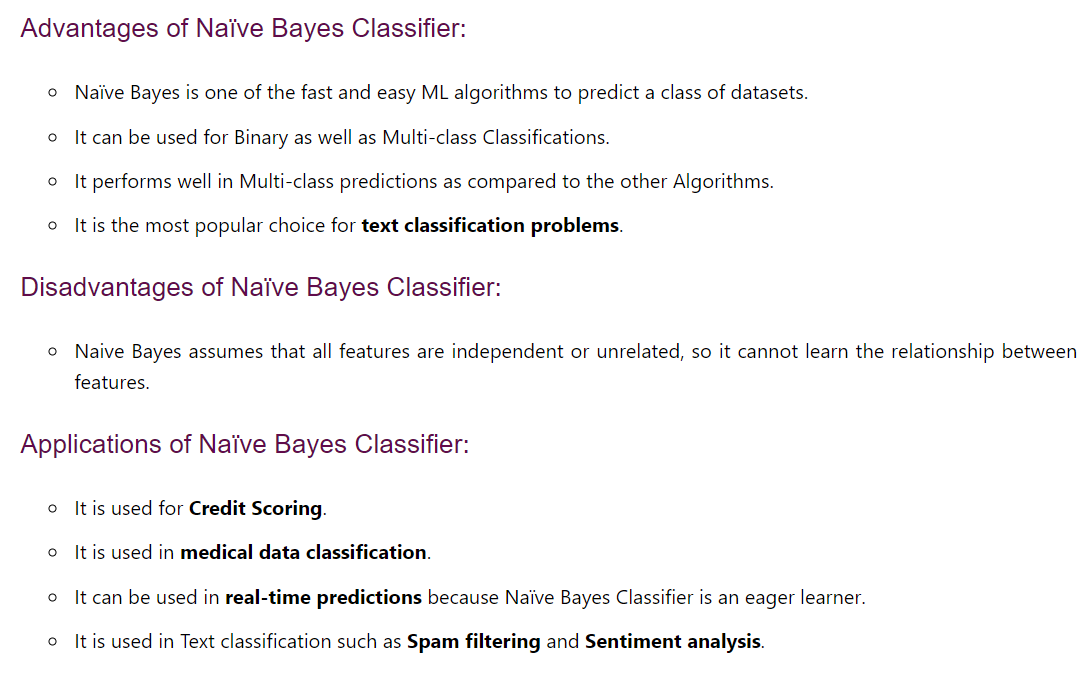

## Bernoulli's Naive Bayes ##

In [132]:
from sklearn.naive_bayes import BernoulliNB

In [1]:
telecom =  pd.read_csv("Telecom.csv")
telecom.head()

NameError: name 'pd' is not defined

In [137]:
dum_tel=pd.get_dummies(telecom,drop_first=True)
dum_tel.head()

,Gender_M,TT_gt_100_Y,Response_Y
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,1
4,0,0,0


In [140]:
X=dum_tel.drop('Response_Y', axis=1)
y=dum_tel['Response_Y']
X,y

(     Gender_M  TT_gt_100_Y
 0           0            1
 1           1            0
 2           1            0
 3           0            1
 4           0            0
 ..        ...          ...
 145         0            1
 146         1            0
 147         1            0
 148         1            0
 149         0            0
 
 [150 rows x 2 columns],
 0      0
 1      0
 2      0
 3      1
 4      0
       ..
 145    1
 146    1
 147    0
 148    0
 149    0
 Name: Response_Y, Length: 150, dtype: uint8)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=2023,
                                                    test_size=0.3)

In [144]:
nb = BernoulliNB()
nb.fit(X_train,y_train) #Apriori probabilities get calculated
y_pred_prob=nb.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))
print(log_loss(y_test,y_pred_prob))

y_pred=nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.8972332015810276
0.39978596913980674
[[21  1]
 [ 5 18]]
0.8666666666666667


In [148]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
nb = BernoulliNB()
res= cross_val_score(nb, X, y, scoring = 'roc_auc', cv=kfold)
print(res)
print(res.mean())

[0.87777778 0.86666667 0.92857143 0.84375    0.875     ]
0.8783531746031746


***

### CANCER DATASET EXCERCISE ###

In [149]:
cancer =  pd.read_csv("Cancer/Cancer.csv")
cancer.head()

,subjid,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,1,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,2,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,3,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,4,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,5,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [155]:
dum_cancer=pd.get_dummies(cancer,drop_first=True)
dum_cancer.head()

,subjid,deg-malig,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,...,inv-nodes_6-8,inv-nodes_9-11,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,Class_recurrence-events
0,1,3,0,1,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
1,2,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,3,0,1,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,0
4,5,2,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1


In [158]:
X=dum_cancer.drop(['Class_recurrence-events','subjid'], axis=1)
y=dum_cancer['Class_recurrence-events']
X,y

(     deg-malig  age_30-39  age_40-49  age_50-59  age_60-69  age_70-79  \
 0            3          0          1          0          0          0   
 1            1          0          0          1          0          0   
 2            2          0          0          1          0          0   
 3            3          0          1          0          0          0   
 4            2          0          1          0          0          0   
 ..         ...        ...        ...        ...        ...        ...   
 281          2          0          0          1          0          0   
 282          2          0          0          1          0          0   
 283          2          1          0          0          0          0   
 284          2          0          0          1          0          0   
 285          3          0          0          1          0          0   
 
      menopause_lt40  menopause_premeno  tumor-size_10-14  tumor-size_15-19  \
 0                 0           

In [162]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
nb = BernoulliNB()
res= cross_val_score(nb, X, y, scoring = 'roc_auc', cv=kfold)
print(res)    # roc_auc values for each split
print(res.mean())
# as its kfold we need to take mean of every fold to get final score
# this res. mean is mean of roc_auc scores of each split.

[0.67790531 0.73529412 0.62205882 0.61764706 0.62352941]
0.655286944045911


## Gaussian Naive Bayes ##

In case of Gaussian NB, we assume that the probability values of indipendant variables are in normal distribution.
And we assume that the X values are independant of each other


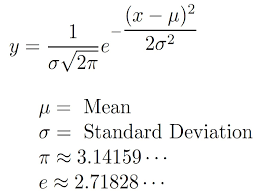


In [161]:
from sklearn.naive_bayes import GaussianNB

In [172]:
bank =  pd.read_csv("Bankruptcy/Bankruptcy.csv")
bank.tail()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14
131,132,1,78,0.26,0.07,0.12,0.17,0.00,0.01,0.01,...,0.05,0.04,0.07,0.10,5.44,1.84,1.40,0.05,0.08,0.12


In [173]:
bank.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [168]:
X=bank.drop(['NO','D','YR'], axis=1)
y=bank['D']
X,y

(       R1    R2    R3    R4    R5    R6    R7     R8    R9   R10  ...   R15  \
 0    0.23  0.08  0.02  0.03  0.46  0.12  0.19  10.36  1.17  0.40  ...  0.05   
 1    0.19  0.07  0.09  0.12  0.02  0.02  0.03   3.13  1.73  0.60  ...  0.09   
 2    0.07  0.02  0.03  0.05  0.06  0.10  0.14   2.41  1.36  0.41  ... -0.03   
 3    0.07  0.03  0.04  0.04  0.04  0.06  0.06   5.55  1.13  0.44  ... -0.02   
 4    0.09  0.02  0.03  0.04  0.06  0.08  0.11   2.85  1.88  0.42  ...  0.02   
 ..    ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
 127  0.27  0.03  0.07  0.10  0.09  0.18  0.26   7.58  2.24  0.28  ...  0.11   
 128  0.32  0.03  0.03  0.09  0.05  0.06  0.16   3.24  5.44  0.46  ...  0.17   
 129  0.08  0.01  0.02  0.05  0.04  0.07  0.15   3.82  2.41  0.37  ...  0.19   
 130  0.14  0.01  0.05  0.07  0.02  0.09  0.14   8.18  1.57  0.11  ...  0.07   
 131  0.26  0.07  0.12  0.17  0.00  0.01  0.01   6.13  1.57  0.39  ...  0.05   
 
       R16   R17   R18     R19   R20  

In [169]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
nb = GaussianNB()
res= cross_val_score(nb, X, y, scoring = 'roc_auc', cv=kfold)
print(res)
print(res.mean())

[0.88736264 0.79945055 0.92307692 0.76331361 0.87573964]
0.849788672865596
